In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt
#import community
from networkx.algorithms.community import greedy_modularity_communities
#import community.community_louvain as cl
import pandas as pd
import scipy.stats as stats
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df_chameleon = pd.read_csv('chameleon_weights.csv')

In [3]:
df_nodes=pd.read_csv('chameleon_labels.csv')

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1)) #
df_chameleon['weight'] = scaler.fit_transform(df_chameleon[['weight']])#
df_chameleon.head()

,source,target,weight
0,0,1161,0.335507
1,0,1667,0.162327
2,0,1991,0.214310
3,0,2130,0.499761
4,0,2156,0.579597


In [5]:
df_chameleon.describe()

,source,target,weight
count,31371.000000,31371.000000,31371.000000
mean,878.200631,1688.166969,0.562518
std,572.287392,501.114051,0.214037
min,0.000000,24.000000,0.000000
25%,386.000000,1356.000000,0.396110
50%,808.000000,1847.000000,0.592694
75%,1303.000000,2094.000000,0.730760
max,2268.000000,2276.000000,1.000000


In [6]:
chameleon_graph= nx.from_pandas_edgelist(df_chameleon, 'source', 'target', create_using=nx.DiGraph())

In [7]:
chameleon_graph.number_of_edges()

31371

In [8]:
GNN_dist= nx.from_pandas_edgelist(df_chameleon, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

In [9]:
df_chameleon_sim = df_chameleon[['source','target','weight']]
df_chameleon_sim['weight']= 1 - df_chameleon_sim['weight']
#df_chameleon_sim['weight']= 1 / df_chameleon_sim['weight']
df_chameleon_sim.head()

,source,target,weight
0,0,1161,0.664493
1,0,1667,0.837673
2,0,1991,0.785690
3,0,2130,0.500239
4,0,2156,0.420403


In [10]:
GNN_sim= nx.from_pandas_edgelist(df_chameleon_sim, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

# Degree Centrality

## GNN_chameleon

In [13]:
# Calculate the weighted degree centrality
def weighted_out_degree(G):
  # Calcolo della weighted out-degree centrality
  out_degrees = dict(G.out_degree(weight='weight'))
  max_weight = max(out_degrees.values())
  weighted_out_degrees = {node: (degree / max_weight) for node, degree in out_degrees.items()}

  # Calcolo della somma delle weighted out-degree centralities
  total_weighted_out_degree = sum(weighted_out_degrees.values())

  # Normalizzazione della weighted out-degree centrality
  weighted_out_degree_centrality_normalized = {node: (degree / total_weighted_out_degree) for node, degree in weighted_out_degrees.items()}
  return dict(sorted(weighted_out_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))
# Print the result

def weighted_in_degree(G):
  in_degrees = dict(G.in_degree(weight='weight'))
  max_weight = max(in_degrees.values())
  weighted_in_degrees = {node: (degree / max_weight) for node, degree in in_degrees.items()}

  # Calcolo della somma delle weighted in-degree centralities
  total_weighted_in_degree = sum(weighted_in_degrees.values())

  # Normalizzazione della weighted in-degree centrality
  weighted_in_degree_centrality_normalized = {node: (degree / total_weighted_in_degree) for node, degree in weighted_in_degrees.items()}

  return dict(sorted(weighted_in_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))

In [14]:
GNN_dist_out_degree = weighted_out_degree(GNN_dist)
GNN_dist_in_degree = weighted_in_degree(GNN_dist)

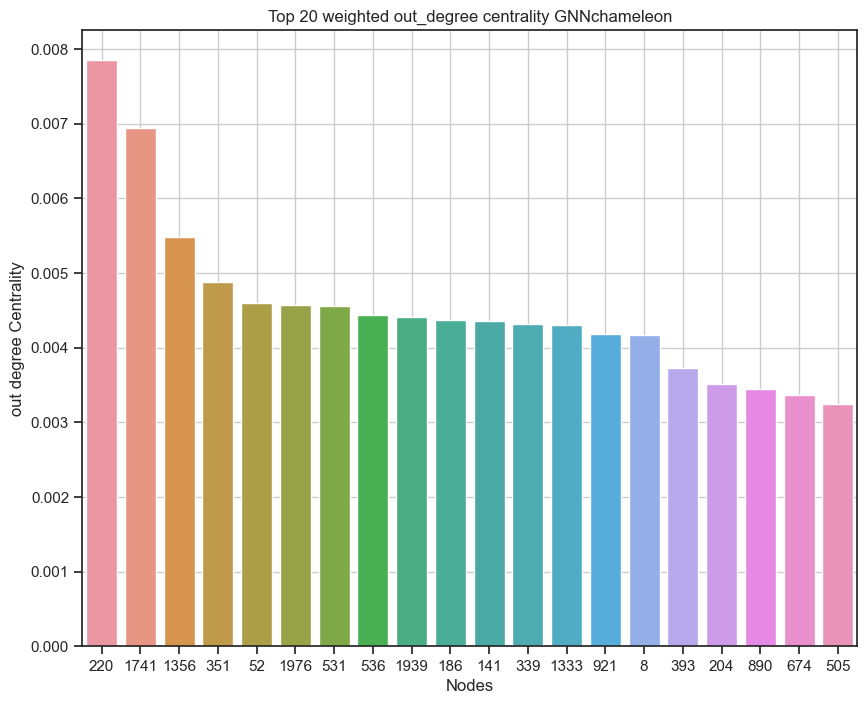

In [15]:
keys = list(map(str,list(GNN_dist_out_degree.keys())[:20]))
values = list(GNN_dist_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('out degree Centrality')
plt.title('Top 20 weighted out_degree centrality GNNchameleon')
plt.grid()
plt.show()

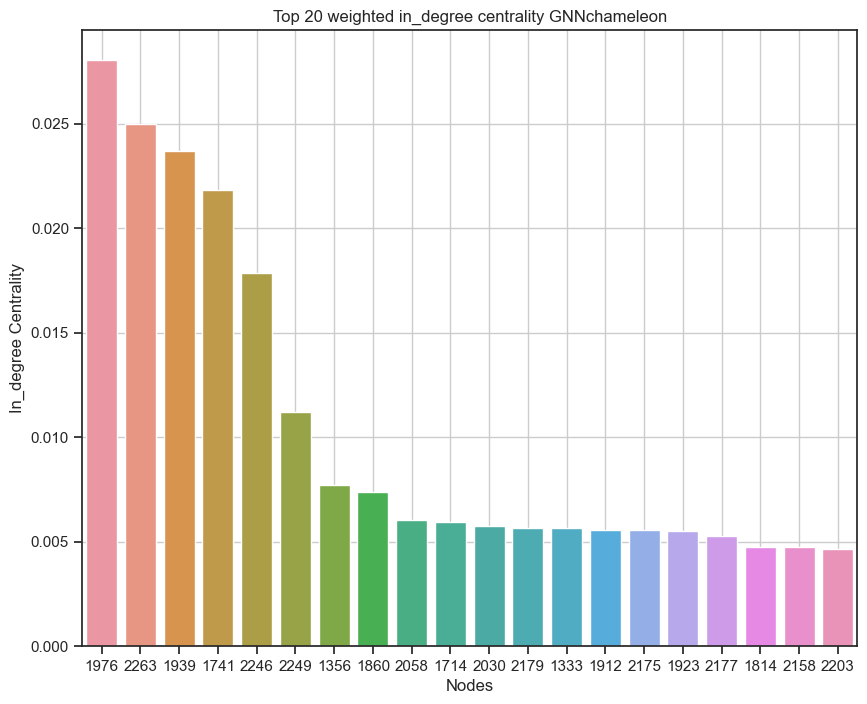

In [16]:
keys = list(map(str,list(GNN_dist_in_degree.keys())[:20]))
values = list(GNN_dist_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('In_degree Centrality')
plt.title('Top 20 weighted in_degree centrality GNNchameleon')
plt.grid()
plt.show()

## chameleon graph

In [17]:
chameleon_out_degree = weighted_out_degree(chameleon_graph)
chameleon_in_degree = weighted_in_degree(chameleon_graph)

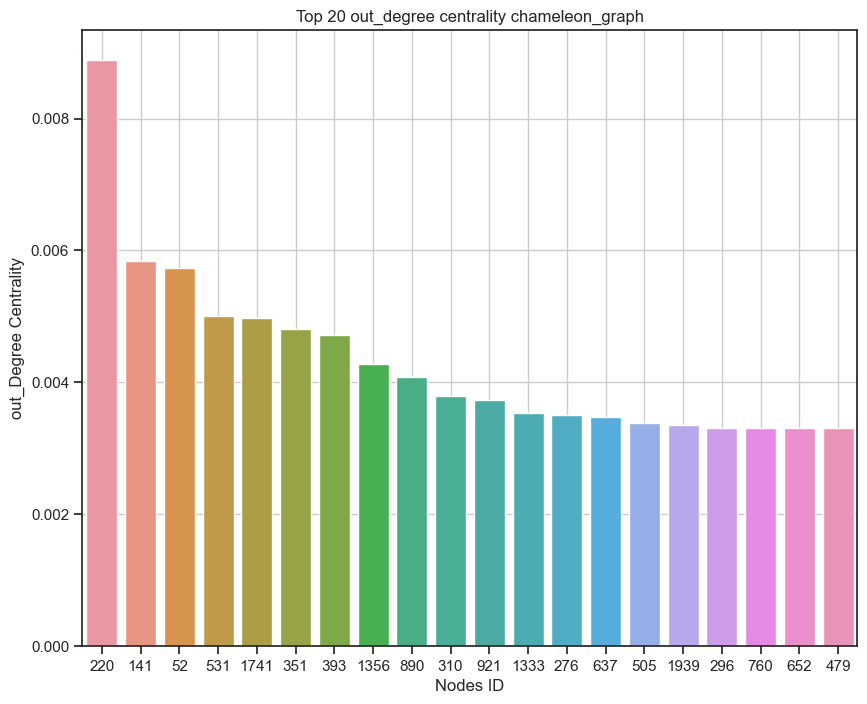

In [18]:

keys = list(map(str,list(chameleon_out_degree.keys())[:20]))
values = list(chameleon_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('out_Degree Centrality')
plt.title('Top 20 out_degree centrality chameleon_graph')
plt.grid()
plt.show()

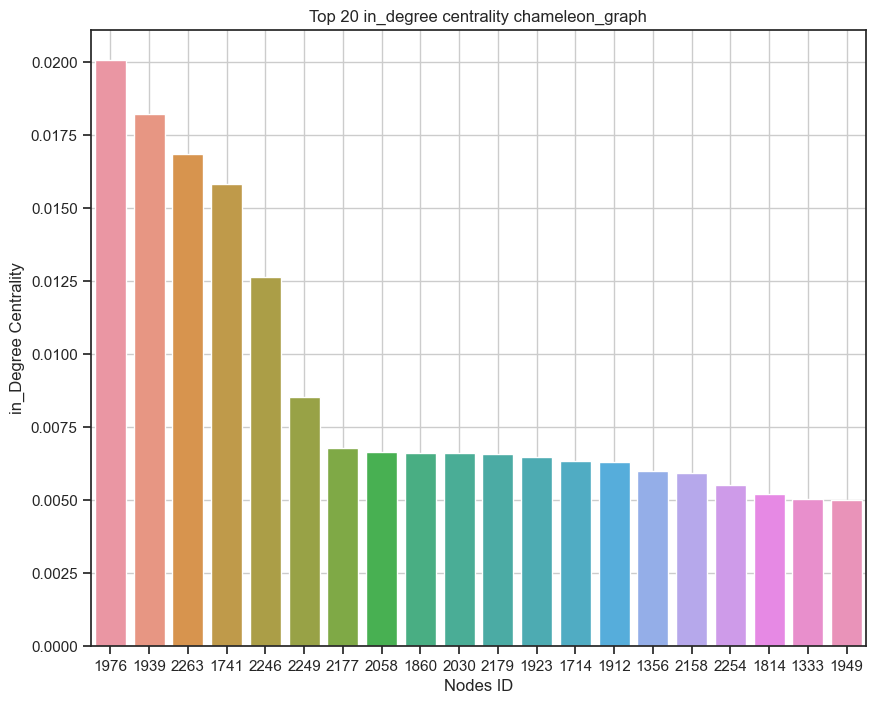

In [19]:
keys = list(map(str,list(chameleon_in_degree.keys())[:20]))
values = list(chameleon_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('in_Degree Centrality')
plt.title('Top 20 in_degree centrality chameleon_graph')
plt.grid()
plt.show()

# Betweeness centrality

## GNN_chameleon

In [20]:
#questa centralità interpreta i pesi come distanza
GNN_betweeness = nx.betweenness_centrality(GNN_dist, weight = 'weight')

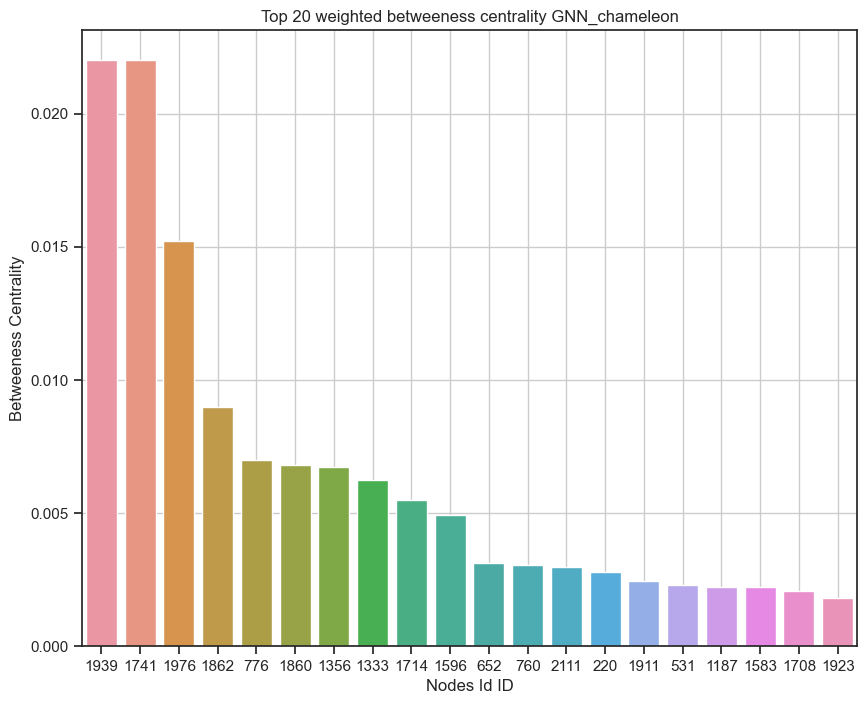

In [21]:
GNN_betweeness = dict(sorted(GNN_betweeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_betweeness.keys())[:20]))
values = list(GNN_betweeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes Id ID')
plt.ylabel('Betweeness Centrality')
plt.title('Top 20 weighted betweeness centrality GNN_chameleon')
plt.grid()
plt.show()

## chameleon graph

In [22]:
bet_chameleon_graph = nx.betweenness_centrality(chameleon_graph)

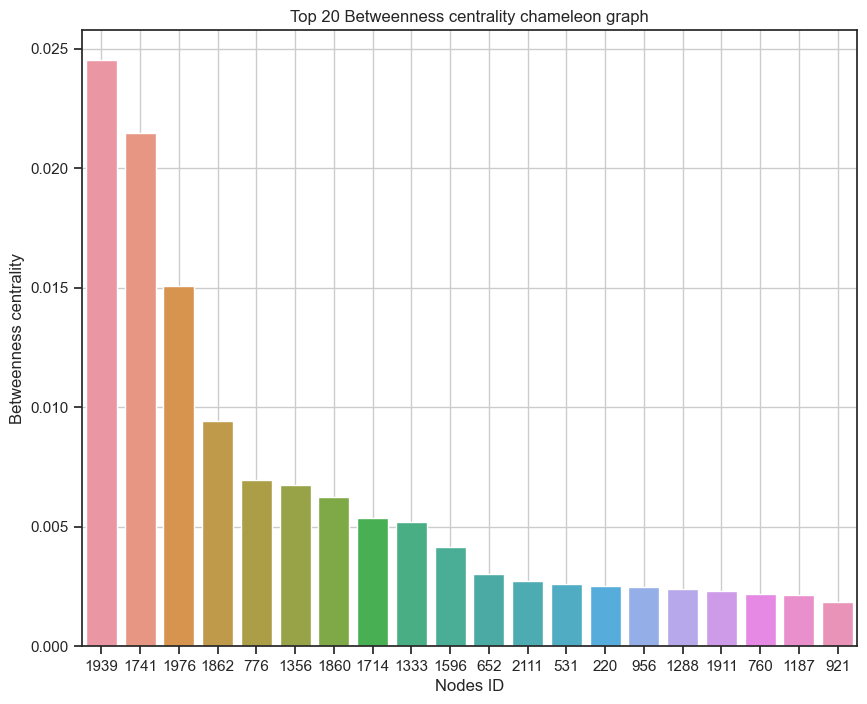

In [23]:
bet_chameleon_graph = dict(sorted(bet_chameleon_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(bet_chameleon_graph.keys())[:20]))
values = list(bet_chameleon_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Betweenness centrality')
plt.title('Top 20 Betweenness centrality chameleon graph')
plt.grid()
plt.show()

# Closeness Centrality

## GNN_chameleon

In [24]:
#questa centralità interpreta i pesi come distanza
GNN_closeness = nx.closeness_centrality(GNN_dist, distance = 'weight')

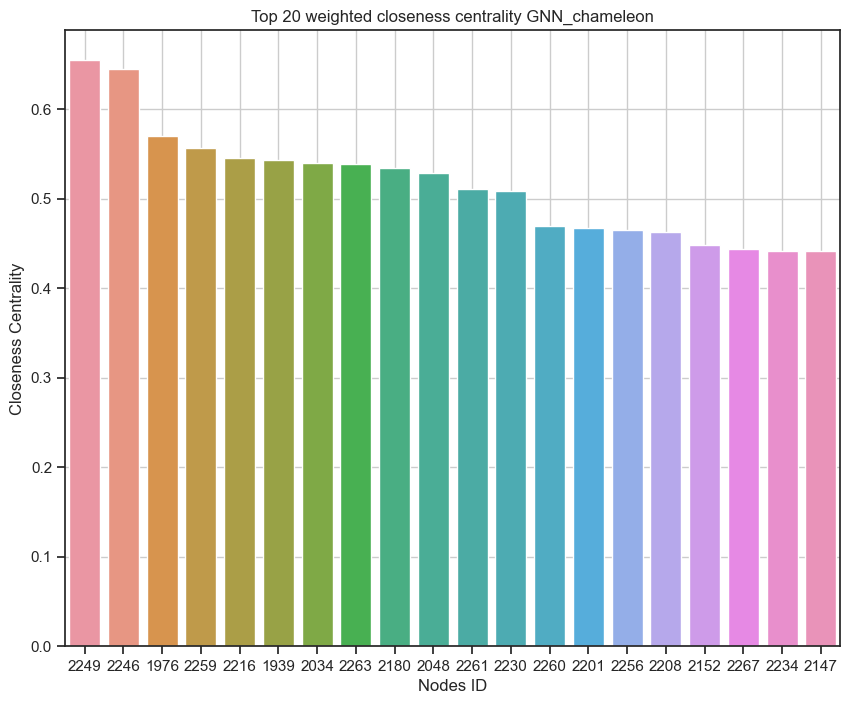

In [25]:
GNN_closeness = dict(sorted(GNN_closeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_closeness.keys())[:20]))
values = list(GNN_closeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness Centrality')
plt.title('Top 20 weighted closeness centrality GNN_chameleon')
plt.grid()
plt.show()

## chameleon

In [26]:
closeness_chameleon_graph = nx.closeness_centrality(chameleon_graph)

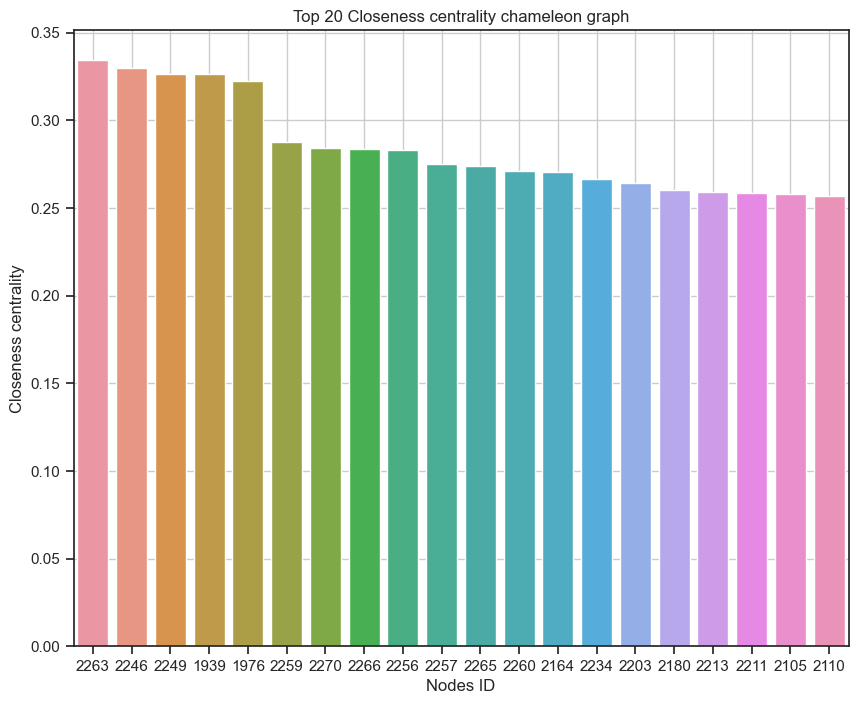

In [27]:
closeness_chameleon_graph = dict(sorted(closeness_chameleon_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(closeness_chameleon_graph.keys())[:20]))
values = list(closeness_chameleon_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness centrality')
plt.title('Top 20 Closeness centrality chameleon graph')
plt.grid()
plt.show()

# Eigenvectror Centrality

## GNN_chameleon

In [28]:
GNN_eigenvector = nx.eigenvector_centrality(GNN_sim, weight = 'weight', max_iter = 1000)

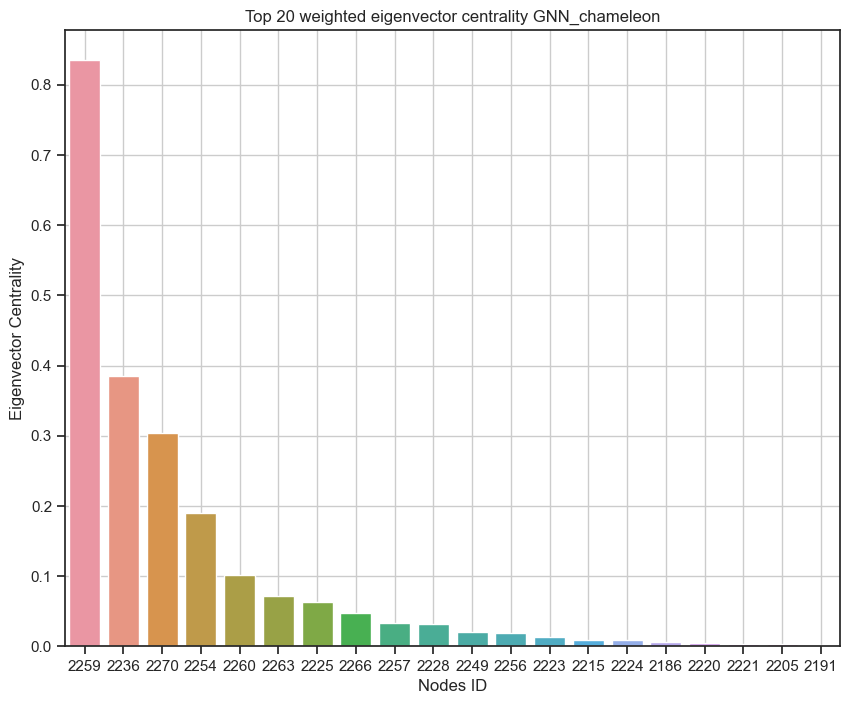

In [29]:
GNN_eigenvector = dict(sorted(GNN_eigenvector.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_eigenvector.keys())[:20]))
values = list(GNN_eigenvector.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Eigenvector Centrality')
plt.title('Top 20 weighted eigenvector centrality GNN_chameleon')
plt.grid()
plt.show()

## chameleon graph

In [30]:
eigen_chameleon_graph = nx.eigenvector_centrality(chameleon_graph, max_iter = 1000)

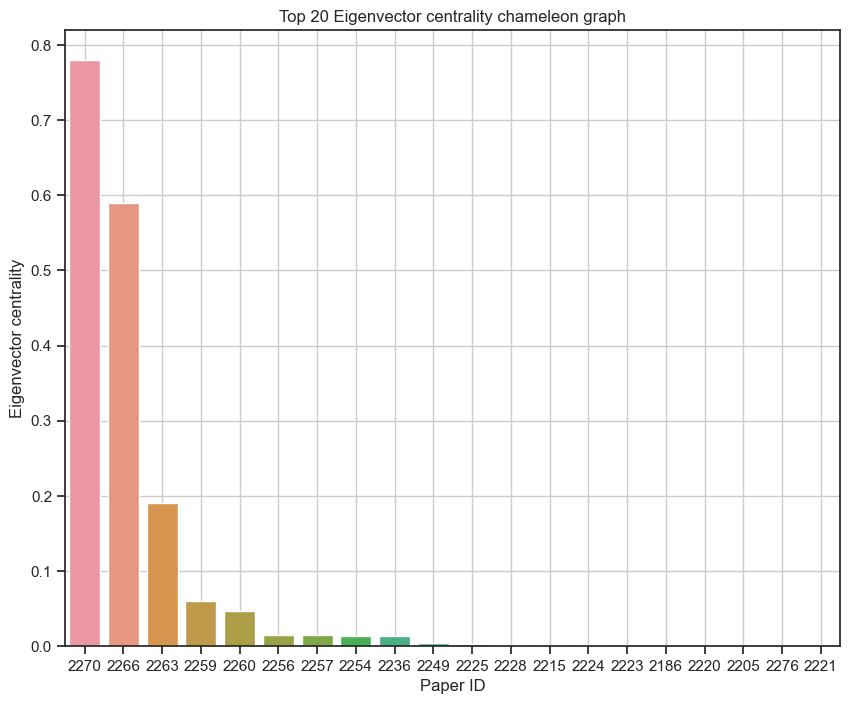

In [31]:
eigen_chameleon_graph = dict(sorted(eigen_chameleon_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(eigen_chameleon_graph.keys())[:20]))
values = list(eigen_chameleon_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Paper ID')
plt.ylabel('Eigenvector centrality')
plt.title('Top 20 Eigenvector centrality chameleon graph')
plt.grid()
plt.show()

# Efficiency

In [32]:
# Calculate the weighted global efficiency
def weighted_global_efficiency(G):
  weighted_efficiency = 0
  for node in G.nodes():
      shortest_paths = nx.shortest_path_length(G, source=node, weight='weight')
      efficiency = sum([1.0 / d for d in shortest_paths.values() if d > 0])
      weighted_efficiency += efficiency

  weighted_efficiency /= (len(G) * (len(G) - 1))
  return round(weighted_efficiency, 3)

In [33]:
#efficiency sulla rete vista dalla GNN
weighted_global_efficiency(GNN_dist)

130.816

In [34]:
weighted_global_efficiency(chameleon_graph)

0.047

## Modularity

In [35]:

def weighted_modularty(G):
  # Compute the partition of the graph using the Louvain method
  partition = greedy_modularity_communities(G, weight='weight')

  # Compute the modularity of the partition using the Louvain method
  modularity = nx.algorithms.community.quality.modularity(G, partition, weight='weight')
  return round(modularity, 3)

In [36]:
print(weighted_modularty(GNN_sim))

0.706


In [37]:
print(weighted_modularty(chameleon_graph))

0.661


# Community

In [11]:
#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

comm_GNN = greedy_modularity_communities(GNN_sim, weight='weight')
comm_chameleon = greedy_modularity_communities(chameleon_graph)

In [12]:
print(len(comm_GNN))
print(len(comm_chameleon))

13
19


In [13]:
for com in comm_GNN:
    print(len(com))

772
438
365
303
177
80
52
32
22
16
11
5
4


In [14]:
for com in comm_chameleon:
    print(len(com))

1014
327
323
240
110
93
35
22
22
20
16
13
11
9
6
5
5
4
2


In [15]:
labels = df_nodes['label'].unique()
mapping = {}
for i in range(len(df_nodes)):
  mapping[i] = df_nodes.loc[i]['label']

In [16]:
def gini_index(cluster, labels):
    """
    Calculates the Gini Index for a given cluster of objects and 7 labels.

    Parameters:
        cluster (list): A list of objects in the cluster.
        labels (list): A list of 7 labels.

    Returns:
        float: The Gini Index for the given cluster and labels.
    """
    total_count = len(cluster)
    if total_count == 0:
        return 0.0

    gini_sum = 0.0
    for label in labels:
        label_count = sum([1 for obj in cluster if mapping[obj] == label])
        label_freq = label_count / total_count
        gini_sum += label_freq ** 2

    gini_index = 1.0 - gini_sum  
    return round(gini_index, 3)

In [17]:
import scipy

gini_GNN = [gini_index(i,labels) for i in comm_GNN]
gini_chameleon = [gini_index(i,labels) for i in comm_chameleon]
#scipy.stats.wilcoxon(gini_GNN, gini_chameleon)

In [18]:
print('mannwhitneyu',scipy.stats.mannwhitneyu(gini_GNN, gini_chameleon))

mannwhitneyu MannwhitneyuResult(statistic=146.5, pvalue=0.387704953576434)


In [19]:
df_nodes['label'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

<AxesSubplot:>

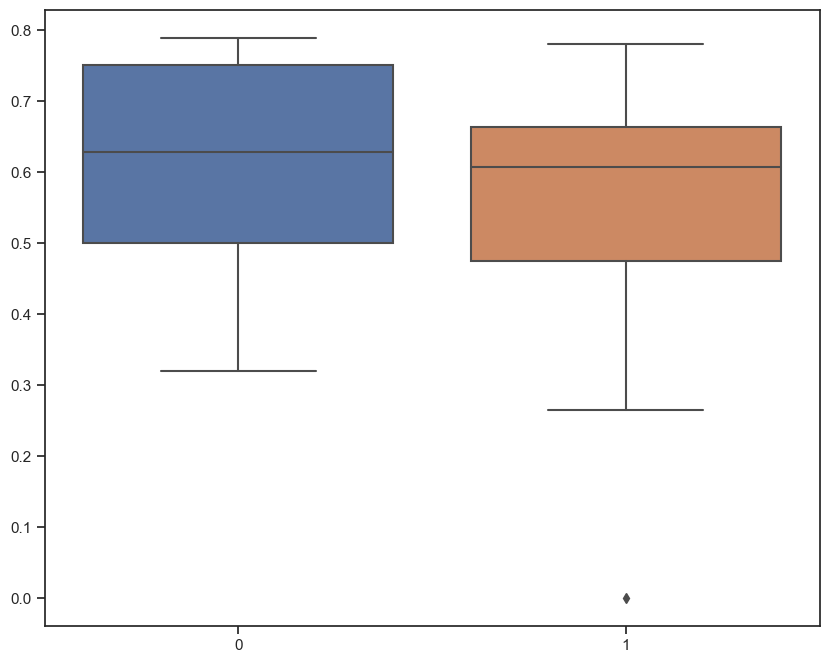

In [20]:
import numpy as np
import seaborn as sns

all_arr = [gini_GNN, gini_chameleon]

sns.boxplot(data=all_arr, )

In [24]:
gini=0
clusters = comm_GNN
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.615

In [25]:
gini=0
clusters = comm_chameleon
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.549

In [23]:
#out degree
x1 = list(GNN_dist_out_degree.keys())[:100]
x2 = list(chameleon_out_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

NameError: name 'GNN_dist_out_degree' is not defined

In [ ]:
#in degree
x1 = list(GNN_dist_in_degree.keys())[:100]
x2 = list(chameleon_in_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.17616161616161619
p_value 0.00940644210204443
Jaccard Index: 0.8348623853211009
[1976, 2263, 1939, 1741, 2246, 2249, 1356, 1860, 2058, 1714, 2030, 2179, 1333, 1912, 2175, 1923, 2177, 1814, 2158, 2203, 2254, 2186, 2234, 2133, 2221, 2020, 2134, 1949, 2212, 2122, 1875, 2004, 2228, 2192, 1895, 1968, 2006, 2105, 2276, 2174, 1931, 1739, 2081, 2110, 2220, 1187, 1817, 1640, 1984, 921, 1898, 1674, 2165, 1727, 2191, 1918, 1845, 2157, 1371, 1066, 2266, 2190, 1921, 1799, 1683, 1547, 2209, 1917, 1288, 1569, 2225, 1520, 1666, 1402, 2260, 1633, 2053, 2204, 2223, 1291, 1534, 1170, 1911, 2199, 1567, 2088, 1466, 1622, 2159, 2213, 1750, 979, 2097, 890, 2013, 1530, 1639, 1184, 1492, 2094]
[1976, 1939, 2263, 1741, 2246, 2249, 2177, 2058, 1860, 2030, 2179, 1923, 1714, 1912, 1356, 2158, 2254, 1814, 1333, 1949, 2186, 2175, 2221, 1968, 2081, 2122, 2228, 1931, 2212, 2004, 2234, 2006, 1875, 2020, 2220, 2110, 1984, 1640, 1187, 2192, 1845, 1739, 2276, 2225, 2157, 1918, 1917, 1898, 2174, 2165, 2223, 1921, 21

In [ ]:
#betweennes
x1 = list(GNN_betweeness.keys())[:100]
x2 = list(bet_chameleon_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.04444444444444445
p_value 0.5123482044261156
Jaccard Index: 0.8018018018018018
[1939, 1741, 1976, 1862, 776, 1860, 1356, 1333, 1714, 1596, 652, 760, 2111, 220, 1911, 531, 1187, 1583, 1708, 1923, 1143, 690, 1066, 1296, 1091, 595, 956, 1288, 1547, 204, 936, 546, 412, 2177, 867, 332, 935, 703, 1959, 1030, 1721, 770, 632, 393, 1414, 2079, 2201, 1427, 1463, 1425, 1432, 1201, 890, 2174, 1937, 921, 2168, 370, 1866, 806, 1350, 943, 1336, 1846, 1285, 1062, 1789, 1965, 1522, 1474, 1510, 835, 1102, 1004, 2110, 1536, 842, 993, 2246, 965, 1940, 2249, 1094, 929, 2042, 1229, 1643, 520, 828, 1346, 1361, 1406, 939, 2050, 2058, 456, 1589, 1503, 2192, 1569]
[1939, 1741, 1976, 1862, 776, 1356, 1860, 1714, 1333, 1596, 652, 2111, 531, 220, 956, 1288, 1911, 760, 1187, 921, 1583, 1708, 1094, 1923, 204, 1522, 1846, 935, 412, 1959, 1547, 867, 1721, 2174, 1066, 1474, 936, 807, 648, 690, 703, 1425, 1414, 1201, 632, 2079, 1285, 2201, 1336, 2110, 1965, 806, 370, 890, 1427, 1569, 929, 546, 393, 1229, 1296, 59

In [ ]:
#closeness
x1 = list(GNN_closeness.keys())[:20]
x2 = list(closeness_chameleon_graph.keys())[:20]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )
print(x1)
print(x2)

tau: -0.09473684210526316
p_value 0.5858584459782121
Jaccard Index: 0.3333333333333333
[2249, 2246, 1976, 2259, 2216, 1939, 2034, 2263, 2180, 2048, 2261, 2230, 2260, 2201, 2256, 2208, 2152, 2267, 2234, 2147]
[2263, 2246, 2249, 1939, 1976, 2259, 2270, 2266, 2256, 2257, 2265, 2260, 2164, 2234, 2203, 2180, 2213, 2211, 2105, 2110]


In [ ]:
#eigenvector

x1 = list(GNN_eigenvector.keys())[:100]
x2 = list(eigen_chameleon_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)

print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.4521212121212122
p_value 2.6461963882084704e-11
Jaccard Index: 0.9230769230769231
[2259, 2236, 2270, 2254, 2260, 2263, 2225, 2266, 2257, 2228, 2249, 2256, 2223, 2215, 2224, 2186, 2220, 2221, 2205, 2191, 2179, 2209, 2275, 2204, 2176, 2276, 2174, 2233, 2265, 2199, 2177, 2246, 2201, 2248, 2192, 2173, 2170, 2161, 2183, 2185, 2158, 2145, 2175, 2153, 2168, 2122, 2127, 2136, 2081, 2119, 2103, 2083, 2086, 2082, 2085, 2090, 2058, 2111, 2038, 2051, 2075, 2121, 2274, 2030, 2245, 2060, 2033, 2027, 2231, 2020, 2050, 2006, 2026, 2004, 1984, 1968, 2017, 2016, 2007, 1949, 2273, 1948, 2140, 2229, 1961, 2001, 2180, 1931, 1929, 1927, 1959, 2165, 1923, 2134, 2238, 1936, 2241, 2244, 1912, 2070]
[2270, 2266, 2263, 2259, 2260, 2256, 2257, 2254, 2236, 2249, 2225, 2228, 2215, 2224, 2223, 2186, 2220, 2205, 2276, 2221, 2191, 2179, 2209, 2248, 2265, 2204, 2275, 2176, 2233, 2246, 2174, 2199, 2201, 2177, 2192, 2170, 2173, 2161, 2185, 2158, 2183, 2175, 2145, 2153, 2168, 2122, 2127, 2136, 2081, 2083, 2086, 210